# Análisis de correlación de contaminantes con variables ambientales

## Importar librerías
Se descargarán las librerías de polars y pandas para la lectura y procesamiento de los datos meteorológicos de los sensores.

In [171]:
import polars as pl
import pandas as pd

## Lectura de datos

In [172]:
# Lectura de datos con Polars para rápida lectura y transformación a DataFrame de pandas para procesamiento
df_ = pl.read_csv(r"./registros_filtrados.csv").to_pandas()

# Despliegue de datos
df_.head()

,Registros_id,Dia,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,Sensor_id,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL
0,2440510,2025-04-04 00:00:00,65.0,23.52,0.056,NaN,0.0033,0.0120,0.0151,0.0047,ANL1,37.92,0.0,712.9,17.0,0.138,15.3
1,2440511,2025-04-04 00:00:00,132.0,NaN,0.035,NaN,0.0467,0.0271,0.0737,0.0046,ANL10,38.37,0.0,701.2,10.0,0.198,12.1
2,2440512,2025-04-04 00:00:00,38.0,31.00,0.063,0.44,0.0028,0.0083,0.0111,0.0106,ANL11,0.00,0.0,701.9,14.0,0.186,18.4
3,2440513,2025-04-04 00:00:00,50.0,NaN,0.056,1.31,0.0045,0.0168,0.0215,0.0059,ANL12,36.75,0.0,702.1,15.0,0.145,16.3
4,2440514,2025-04-04 00:00:00,53.0,16.00,0.061,0.52,NaN,0.0032,0.0056,0.0047,ANL13,38.88,0.0,717.8,16.0,0.053,12.3


## Análisis inicial de datos

**Tipos de Datos**</br>
Se identifica el tipo de datos que conforma cada una de las columnas. Así como el número de registros no nulos que conforma a cada columna. Como se puede observar, son un total de 786,656 registros, de los cuales las columnas Registros_id, Dia y Sensores_id cuentan con todos los registros completos. Por el contrario, todos los datos meteorológicos cuentan con valores nulos, donde NO1, NOx y la LLUVIA son las columnas con mayor número de registros nulos. Por el contrario, PM10, SO2 Y CO cuentan con la mayor completitud de registros. </br></br>
Cabe señalar que las columnas Sensores_id y Dia son las únicas columnas del tipo *object*, donde la segunda tiene que transformarse a Datetime para poder extraer datos relacionados al tiempo. 

In [173]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786656 entries, 0 to 786655
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Registros_id  786656 non-null  int64  
 1   Dia           786656 non-null  object 
 2   PM10          734806 non-null  float64
 3   PM25          551655 non-null  float64
 4   O3            573681 non-null  float64
 5   CO            599191 non-null  float64
 6   NO1           294385 non-null  float64
 7   NO2           524324 non-null  float64
 8   NOx           299245 non-null  float64
 9   SO2           580449 non-null  float64
 10  Sensor_id     786656 non-null  object 
 11  TEMPERATURA   364847 non-null  float64
 12  LLUVIA        316582 non-null  float64
 13  PRESIONATM    316582 non-null  float64
 14  HUMEDAD       364847 non-null  float64
 15  RS            316582 non-null  float64
 16  VIENTOVEL     316582 non-null  float64
dtypes: float64(14), int64(1), object(2)
memory usage

**Transformación de datos**

In [174]:
# Transformación de columna Dia de object a Datetime
df_["Dia"] = pd.to_datetime(df_["Dia"], format="%Y-%m-%d %H:%M:%S")

# Creación de feature Year con el año del registro
df_['Year'] = df_['Dia'].dt.year

**Resumen de estadísticos descriptivos**</br>
Se identifica el comportamiento de las columnas cuantitativas, identificando outliers, medianas y media de cada columna.</br></br>
Como se puede observar, hay un amplio número de columnas con valores faltantes. Así como la identificación de fallas en la lectura de sensores donde indican mínimos de lecturas de -9999 o -9.999, donde estas mediciones no son posibles en la escala de sus unidades. 

In [175]:
# Despliegue de tabla con estadísticos descriptivos
df_.describe()

,Registros_id,Dia,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year
count,7.866560e+05,786656,734806.000000,551655.000000,573681.000000,599191.000000,294385.000000,524324.000000,299245.000000,580449.000000,364847.000000,316582.000000,316582.000000,364847.000000,316582.000000,316582.000000,786656.000000
mean,2.018911e+06,2021-09-23 13:37:51.832160768,56.620974,-0.597085,0.024970,-0.221352,0.010499,0.013200,0.026091,-0.001399,19.463358,-1.683629,683.842958,48.000384,-3.419143,5.925985,2021.239527
min,6.055000e+03,2018-01-01 08:00:00,-9999.000000,-9999.000000,-9.999000,-9999.000000,-9.999000,-9.999000,-9.999000,-9.999000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2018.000000
25%,1.788896e+06,2019-09-23 17:45:00,33.000000,10.440000,0.012000,0.680000,0.003200,0.006700,0.011800,0.002900,16.580000,0.000000,709.000000,33.000000,0.000000,4.100000,2019.000000
50%,2.035342e+06,2021-11-21 12:00:00,49.000000,17.000000,0.023000,1.140000,0.005500,0.011500,0.019100,0.003900,23.210000,0.000000,714.300000,55.000000,0.001000,7.000000,2021.000000
75%,2.240838e+06,2023-09-19 21:00:00,72.000000,27.000000,0.036000,1.820000,0.012700,0.019700,0.033700,0.005800,27.900000,0.000000,721.400000,73.000000,0.212000,10.700000,2023.000000
max,2.440719e+06,2025-04-04 13:00:00,1001.000000,825.440000,0.723000,55.470000,0.500000,0.188600,0.500000,0.529900,718.700000,718.500000,750.000000,718.200000,822.000000,718.000000,2025.000000
std,2.522754e+05,NaN,147.720410,463.198480,0.118369,124.580753,0.164497,0.130971,0.164569,0.256278,146.790486,130.587084,202.470357,177.282457,188.909288,133.168242,2.179711


## Análisis de valores nulos

**Despliegue de porcentaje de valores nulos por variables**

In [176]:
df_.isnull().mean()

Registros_id    0.000000
Dia             0.000000
PM10            0.065912
PM25            0.298734
O3              0.270735
CO              0.238306
NO1             0.625777
NO2             0.333477
NOx             0.619599
SO2             0.262131
Sensor_id       0.000000
TEMPERATURA     0.536205
LLUVIA          0.597560
PRESIONATM      0.597560
HUMEDAD         0.536205
RS              0.597560
VIENTOVEL       0.597560
Year            0.000000
dtype: float64

**Porcentaje de valores nulos por sensor**</br>Dentro de la tabla presentada, se puede observar un alto porcentaje de valores faltantes de registros de contaminantes y variables climatológicas, a excepción de PM10, CO y SO. Dos sensores a destacar son ANL15 y ANL16 donde sus lecturas de PM25, una de las variables contaminantes en el ambiente, tienen lectura prácticamente nulas con más de 95% de registros faltantes. Este factor se contemplará para considerar la eliminación de dichos sensores posterior del análisis de otros factores que podrían influir esta falta de información, como lo es la fecha. 


In [177]:
# Agrupación de datos por Id de Sensor con el cálculo del porcentaje de valores faltantes
missing_pct_by_sensor = df_.groupby('Sensor_id').apply(lambda x: x.isnull().mean() * 100)
missing_pct_by_sensor

,Registros_id,Dia,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,Sensor_id,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year
Sensor_id,,,,,,,,,,,,,,,,,,
ANL1,0.0,0.0,7.781629,22.303348,7.621527,21.750910,65.082074,46.709126,64.197118,13.856683,0.0,56.016116,62.080614,62.080614,56.016116,62.080614,62.080614,0.0
ANL10,0.0,0.0,6.460803,27.058348,45.417297,25.196075,63.320789,45.543910,63.282102,41.900257,0.0,56.021173,62.082791,62.082791,56.021173,62.082791,62.082791,0.0
ANL11,0.0,0.0,5.058215,36.318548,40.527278,32.808048,63.813360,40.145626,62.962116,19.538148,0.0,56.009708,62.072180,62.072180,56.009708,62.072180,62.072180,0.0
ANL12,0.0,0.0,6.091147,25.861432,14.421403,21.052539,64.803968,17.789738,63.261393,28.654600,0.0,56.072679,62.135683,62.135683,56.072679,62.135683,62.135683,0.0
ANL13,0.0,0.0,6.720841,25.692576,42.968709,44.727631,63.745097,41.067314,62.939511,27.949273,0.0,56.005840,62.068844,62.068844,56.005840,62.068844,62.068844,0.0
ANL15,0.0,0.0,8.783557,98.436307,9.259995,9.675350,39.993281,8.841584,39.690926,38.209694,0.0,23.611154,34.138595,34.138595,23.611154,34.138595,34.138595,0.0
ANL16,0.0,0.0,7.438183,95.919051,12.202640,15.104202,33.317698,32.064598,32.084701,11.043356,0.0,1.092274,1.092274,1.092274,1.092274,1.092274,1.092274,0.0
ANL2,0.0,0.0,4.879036,18.251078,25.051465,33.869974,63.174100,44.296648,62.936571,15.808921,0.0,55.988387,62.065629,62.065629,55.988387,62.065629,62.065629,0.0
ANL3,0.0,0.0,5.489264,22.141851,22.627596,21.326998,63.553326,33.632524,63.363252,16.219641,0.0,55.983809,62.050334,62.050334,55.983809,62.050334,62.050334,0.0


**Porcentaje de valores nulos por año**</br>Dentro de la tabla presentada, se puede observar un alto porcentaje de valores faltantes de registros de ambientales y contaminantes previo al 2021. Esta falta de datos puede influenciar tanto el análisis de los datos y el modelado de los modelos de Machine Learning. Por esta razón, se ha determinado eliminar los registros previos a este año para mantener completitud en los datos a emplear. 


In [178]:
# Agrupación de datos por año con el cálculo del porcentaje de valores faltantes
missing_pct_by_year = df_.groupby('Year').apply(lambda x: x.isnull().mean() * 100)
missing_pct_by_year

,Registros_id,Dia,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,Sensor_id,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year
Year,,,,,,,,,,,,,,,,,,
2018,0.0,0.0,5.222543,51.049430,45.825130,52.802876,100.000000,63.450991,100.000000,52.639397,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
2019,0.0,0.0,4.137349,19.979621,61.988212,36.872480,100.000000,78.203811,100.000000,53.521139,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
2020,0.0,0.0,8.582984,23.588886,61.609762,49.653431,100.000000,77.542576,100.000000,44.482368,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
2021,0.0,0.0,8.884029,20.436360,9.358797,8.284434,100.000000,8.011309,100.000000,14.457484,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
2022,0.0,0.0,4.440640,19.514328,4.595289,4.343063,54.301179,3.670155,53.595132,5.124594,0.0,7.630278,52.059687,52.059687,7.630278,52.059687,52.059687,0.0
2023,0.0,0.0,9.516520,30.481139,11.620996,11.437293,10.624139,9.439076,9.345424,10.113553,0.0,5.639853,5.639853,5.639853,5.639853,5.639853,5.639853,0.0
2024,0.0,0.0,6.142660,36.801287,6.631573,10.593647,7.689063,6.427729,5.902889,10.373402,0.0,0.258515,0.258515,0.258515,0.258515,0.258515,0.258515,0.0
2025,0.0,0.0,7.089121,39.550492,7.491806,13.060715,14.793195,14.246917,13.588263,11.549867,0.0,0.081161,0.081161,0.081161,0.081161,0.081161,0.081161,0.0


### Eliminación de datos

**Eliminación de datos previo al 2021**</br>


In [179]:
# Eliminar los registros previos al 2021 que contienen muchos valores nulos del clima
df_ = df_.drop(index=df_[df_["Year"] <= 2021].index)

# Confirmación de eliminado de años previo al 2021
df_["Year"].unique()

array([2025, 2024, 2023, 2022])

### Análisis de valores nulos 2022 - 2025
Una vez eliminado los registros previos al 2021. Se puede observar que los datos climatológicos del 2022 cuentan con un 52% de valores nulos en las columnas LLUVIA, PRESIONATM, RS y VIENTOVEL.

In [180]:
missing_pct_by_year = df_.groupby('Year').apply(lambda x: x.isnull().mean() * 100)
missing_pct_by_year

,Registros_id,Dia,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,Sensor_id,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year
Year,,,,,,,,,,,,,,,,,,
2022,0.0,0.0,4.440640,19.514328,4.595289,4.343063,54.301179,3.670155,53.595132,5.124594,0.0,7.630278,52.059687,52.059687,7.630278,52.059687,52.059687,0.0
2023,0.0,0.0,9.516520,30.481139,11.620996,11.437293,10.624139,9.439076,9.345424,10.113553,0.0,5.639853,5.639853,5.639853,5.639853,5.639853,5.639853,0.0
2024,0.0,0.0,6.142660,36.801287,6.631573,10.593647,7.689063,6.427729,5.902889,10.373402,0.0,0.258515,0.258515,0.258515,0.258515,0.258515,0.258515,0.0
2025,0.0,0.0,7.089121,39.550492,7.491806,13.060715,14.793195,14.246917,13.588263,11.549867,0.0,0.081161,0.081161,0.081161,0.081161,0.081161,0.081161,0.0


**Estrategia de llenado de valores climatológicos para el 2022**</br>
Dado al alto volumen de datos se 

In [181]:
df_['period_signature'] = df_['Dia'].dt.strftime('%m-%d %H:%M:%S')

# Create key for easier mapping
df_['key'] = df_['Sensor_id'].astype(str) + '_' + df_['period_signature']

# Compute aggregated means (excluding 2022)
agg_means = df_[df_['Year'] != 2022].groupby('key')[["LLUVIA", "PRESIONATM", "RS", "VIENTOVEL"]].mean()

# Identify 2022 rows with missing values
mask_2022 = (df_['Year'] == 2022)
for col in ["LLUVIA", "PRESIONATM", "RS", "VIENTOVEL"]:
    # Map aggregated mean to 2022 rows
    filled_values = df_.loc[mask_2022, 'key'].map(agg_means[col])
    
    # Fill only the missing values
    df_.loc[mask_2022 & df_[col].isnull(), col] = filled_values
    
missing_pct_by_year = df_.groupby('Year').apply(lambda x: x.isnull().mean() * 100)
missing_pct_by_year

,Registros_id,Dia,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,Sensor_id,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year,period_signature,key
Year,,,,,,,,,,,,,,,,,,,,
2022,0.0,0.0,4.440640,19.514328,4.595289,4.343063,54.301179,3.670155,53.595132,5.124594,0.0,7.630278,0.144523,0.144523,7.630278,0.144523,0.144523,0.0,0.0,0.0
2023,0.0,0.0,9.516520,30.481139,11.620996,11.437293,10.624139,9.439076,9.345424,10.113553,0.0,5.639853,5.639853,5.639853,5.639853,5.639853,5.639853,0.0,0.0,0.0
2024,0.0,0.0,6.142660,36.801287,6.631573,10.593647,7.689063,6.427729,5.902889,10.373402,0.0,0.258515,0.258515,0.258515,0.258515,0.258515,0.258515,0.0,0.0,0.0
2025,0.0,0.0,7.089121,39.550492,7.491806,13.060715,14.793195,14.246917,13.588263,11.549867,0.0,0.081161,0.081161,0.081161,0.081161,0.081161,0.081161,0.0,0.0,0.0


In [182]:
missing_pct_by_sensor = df_.loc[df_["Year"] == 2022].groupby('Sensor_id').apply(lambda x: x.isnull().mean() * 100)
missing_pct_by_sensor

,Registros_id,Dia,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,Sensor_id,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year,period_signature,key
Sensor_id,,,,,,,,,,,,,,,,,,,,
ANL1,0.0,0.0,4.215004,9.242073,3.776747,2.023717,54.511472,2.139727,52.797113,2.139727,0.0,7.605053,0.154679,0.154679,7.605053,0.154679,0.154679,0.0,0.0,0.0
ANL10,0.0,0.0,2.796752,8.184044,4.111355,1.933239,52.738755,3.157623,52.854749,6.701895,0.0,7.616961,0.141771,0.141771,7.616961,0.141771,0.141771,0.0,0.0,0.0
ANL11,0.0,0.0,3.158030,23.794792,3.377159,5.143078,54.292343,3.080691,53.892756,3.699407,0.0,7.605053,0.141789,0.141789,7.605053,0.141789,0.141789,0.0,0.0,0.0
ANL12,0.0,0.0,3.816400,18.347086,5.350696,3.236204,56.317690,3.326457,53.996906,11.526560,0.0,7.581227,0.141826,0.141826,7.581227,0.141826,0.141826,0.0,0.0,0.0
ANL13,0.0,0.0,4.935567,14.046392,5.502577,7.152062,53.389175,3.840206,52.989691,3.956186,0.0,7.628866,0.141753,0.141753,7.628866,0.141753,0.141753,0.0,0.0,0.0
ANL15,0.0,0.0,8.902345,98.879155,6.261273,7.201752,56.956970,6.583355,56.802371,6.467405,0.0,7.652667,0.141716,0.141716,7.652667,0.141716,0.141716,0.0,0.0,0.0
ANL2,0.0,0.0,3.064246,6.939616,4.918244,2.420497,53.547058,2.497747,53.263808,6.772242,0.0,7.621990,0.141625,0.141625,7.621990,0.141625,0.141625,0.0,0.0,0.0
ANL3,0.0,0.0,4.367994,12.253576,6.867672,10.359490,53.472491,4.213375,53.150367,6.171885,0.0,7.640768,0.141734,0.141734,7.640768,0.141734,0.141734,0.0,0.0,0.0
ANL4,0.0,0.0,3.994845,4.304124,2.487113,1.675258,52.951031,1.314433,52.216495,1.378866,0.0,7.628866,0.141753,0.141753,7.628866,0.141753,0.141753,0.0,0.0,0.0


In [183]:
missing_pct_by_sensor = df_.groupby('Sensor_id').apply(lambda x: x.isnull().mean() * 100)
missing_pct_by_sensor

,Registros_id,Dia,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,Sensor_id,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year,period_signature,key
Sensor_id,,,,,,,,,,,,,,,,,,,,
ANL1,0.0,0.0,8.885392,28.751823,8.532279,17.578875,23.823597,6.812773,21.892991,6.858832,0.0,4.045444,1.826975,1.826975,4.045444,1.826975,1.826975,0.0,0.0,0.0
ANL10,0.0,0.0,6.330279,29.531076,8.235881,12.246463,20.026073,5.528929,19.941720,6.621679,0.0,4.110272,1.886431,1.886431,4.110272,1.886431,1.886431,0.0,0.0,0.0
ANL11,0.0,0.0,4.291796,22.529053,3.804702,9.300809,21.086948,4.590956,19.230622,3.597591,0.0,4.069344,1.848656,1.848656,4.069344,1.848656,1.848656,0.0,0.0,0.0
ANL12,0.0,0.0,5.807887,26.074114,7.146693,5.182599,23.239221,4.787479,19.874942,8.090379,0.0,4.196716,1.983275,1.983275,4.196716,1.983275,1.983275,0.0,0.0,0.0
ANL13,0.0,0.0,6.187663,10.687433,8.612091,11.692497,20.929876,6.018874,19.172932,5.255486,0.0,4.050944,1.822157,1.822157,4.050944,1.822157,1.822157,0.0,0.0,0.0
ANL15,0.0,0.0,8.948864,98.118857,9.643735,9.662930,24.570025,9.186886,24.189957,46.157095,0.0,3.977273,1.739097,1.739097,3.977273,1.739097,1.739097,0.0,0.0,0.0
ANL16,0.0,0.0,7.438183,95.919051,12.202640,15.104202,33.317698,32.064598,32.084701,11.043356,0.0,1.092274,1.092274,1.092274,1.092274,1.092274,1.092274,0.0,0.0,0.0
ANL2,0.0,0.0,6.138196,11.428023,6.748560,5.378119,19.654511,3.984645,19.136276,5.884837,0.0,3.976967,1.746641,1.746641,3.976967,1.746641,1.746641,0.0,0.0,0.0
ANL3,0.0,0.0,5.799885,21.317457,8.108316,7.236413,20.457077,5.876704,20.042251,5.838295,0.0,3.937008,1.701556,1.701556,3.937008,1.701556,1.701556,0.0,0.0,0.0


In [184]:
df_.columns

Index(['Registros_id', 'Dia', 'PM10', 'PM25', 'O3', 'CO', 'NO1', 'NO2', 'NOx',
       'SO2', 'Sensor_id', 'TEMPERATURA', 'LLUVIA', 'PRESIONATM', 'HUMEDAD',
       'RS', 'VIENTOVEL', 'Year', 'period_signature', 'key'],
      dtype='object')

In [185]:
df_['hour'] = df_['Dia'].dt.hour
df_.sort_values(['Sensor_id', 'Dia'], inplace=True)

pollutant_columns = ['PM10', 'PM25', 'O3', 'CO', 'NO1', 'NO2', 'NOx',
       'SO2']

# For each pollutant column, fill missing values
for pollutant in pollutant_columns:
    df_.set_index('Dia', inplace=True)
    #  Interpolate small gaps (within each Sensor_id)
    df_[pollutant] = df_.groupby('Sensor_id')[pollutant].transform(lambda x: x.interpolate(method='time'))
    
    df_.reset_index(inplace=True)
    
    # 2️⃣ Fill remaining missing values with hourly median (same Sensor_id, year, hour)
    hourly_median = df_.groupby(['Sensor_id', 'Year', 'hour'])[pollutant].transform('median')
    df_[pollutant].fillna(hourly_median, inplace=True)


In [186]:
missing_pct_by_sensor = df_.groupby('Sensor_id').apply(lambda x: x.isnull().mean() * 100)
missing_pct_by_sensor

,Dia,Registros_id,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,...,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year,period_signature,key,hour
Sensor_id,,,,,,,,,,,,,,,,,,,,,
ANL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.045444,1.826975,1.826975,4.045444,1.826975,1.826975,0.0,0.0,0.0,0.0
ANL10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.110272,1.886431,1.886431,4.110272,1.886431,1.886431,0.0,0.0,0.0,0.0
ANL11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.069344,1.848656,1.848656,4.069344,1.848656,1.848656,0.0,0.0,0.0,0.0
ANL12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.196716,1.983275,1.983275,4.196716,1.983275,1.983275,0.0,0.0,0.0,0.0
ANL13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.050944,1.822157,1.822157,4.050944,1.822157,1.822157,0.0,0.0,0.0,0.0
ANL15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.977273,1.739097,1.739097,3.977273,1.739097,1.739097,0.0,0.0,0.0,0.0
ANL16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.092274,1.092274,1.092274,1.092274,1.092274,1.092274,0.0,0.0,0.0,0.0
ANL2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.976967,1.746641,1.746641,3.976967,1.746641,1.746641,0.0,0.0,0.0,0.0
ANL3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.937008,1.701556,1.701556,3.937008,1.701556,1.701556,0.0,0.0,0.0,0.0


In [187]:
df_['month'] = df_['Dia'].dt.month

weather_columns = ['TEMPERATURA', 'LLUVIA', 'PRESIONATM', 'HUMEDAD',
       'RS', 'VIENTOVEL']

for col in weather_columns:
    # 1️⃣ Interpolate small gaps
    def interpolate_group(g):
        g = g.sort_values('Dia')
        g[col] = g.set_index('Dia')[col].interpolate(method='time').values
        return g

    df_ = df_.groupby('Sensor_id').apply(interpolate_group).reset_index(drop=True)
    
    # 2️⃣ Fill missing with median by same month & hour
    median_month_hour = df_.groupby(['Sensor_id', 'month', 'hour'])[col].transform('median')
    df_[col].fillna(median_month_hour, inplace=True)

In [188]:
missing_pct_by_sensor = df_.groupby('Sensor_id').apply(lambda x: x.isnull().mean() * 100)
missing_pct_by_sensor

,Dia,Registros_id,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,...,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year,period_signature,key,hour,month
Sensor_id,,,,,,,,,,,,,,,,,,,,,
ANL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
df_.describe()

,Dia,Registros_id,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year,hour,month
count,379756,3.797560e+05,379756.000000,379756.000000,379756.000000,379756.000000,379756.000000,379756.000000,379756.000000,379756.000000,379756.000000,379756.000000,379756.000000,379756.000000,379756.000000,379756.000000,379756.000000,379756.000000,379756.000000
mean,2023-09-13 12:09:38.389282304,2.246383e+06,37.646980,-1401.003056,-0.021089,-89.889311,-0.089711,-0.087580,-0.074816,-0.246437,19.422788,-1.527555,682.459032,48.013787,-3.586884,6.125488,2023.219815,11.481406,6.280617
min,2022-01-01 00:00:00,2.048929e+06,-9999.000000,-9999.000000,-9.999000,-9999.000000,-9.999000,-9.999000,-9.999000,-9.999000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2022.000000,0.000000,1.000000
25%,2022-11-20 22:00:00,2.149626e+06,35.000000,6.333333,0.012000,0.690000,0.003200,0.007200,0.012100,0.002800,16.350000,0.000000,708.600000,33.000000,0.000000,4.300000,2022.000000,5.000000,3.000000
50%,2023-10-09 03:30:00,2.247660e+06,52.000000,14.000000,0.022500,1.190000,0.005300,0.012200,0.018400,0.003700,23.020000,0.000000,714.066667,54.000000,0.002000,7.133333,2023.000000,11.000000,6.000000
75%,2024-07-03 17:00:00,2.343615e+06,76.000000,24.000000,0.036000,1.810000,0.011500,0.020524,0.031400,0.005000,27.810000,0.000000,721.200000,73.000000,0.217000,10.750000,2024.000000,17.000000,9.000000
max,2025-04-04 13:00:00,2.440719e+06,1001.000000,782.000000,0.723000,55.470000,0.500000,0.167800,0.500000,0.529900,718.700000,718.500000,750.000000,718.200000,822.000000,718.000000,2025.000000,23.000000,12.000000
std,NaN,1.128653e+05,452.122311,3404.709358,0.626554,846.140700,0.981404,0.984820,0.982802,1.512517,144.346683,122.290625,195.142700,174.007745,183.179507,125.922374,0.955161,6.930691,3.606597


In [190]:
df_ = df_.drop(index=df_[df_["Sensor_id"].isin(["ANL15, ANL16", "ANL7"])].index)

In [191]:
df_.describe()

,Dia,Registros_id,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year,hour,month
count,353704,3.537040e+05,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000
mean,2023-09-14 05:58:03.980956416,2.246625e+06,37.132542,-1218.756442,-0.024400,-96.623559,-0.097021,-0.094362,-0.082091,-0.264929,19.744484,-1.642194,683.299945,48.751860,-3.862671,6.024208,2023.221728,11.481468,6.282007
min,2022-01-01 00:00:00,2.048929e+06,-9999.000000,-9999.000000,-9.999000,-9999.000000,-9.999000,-9.999000,-9.999000,-9.999000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2022.000000,0.000000,1.000000
25%,2022-11-21 19:00:00,2.149913e+06,36.000000,7.000000,0.012000,0.680000,0.003300,0.007200,0.012200,0.002723,16.620000,0.000000,708.500000,34.094203,0.000000,4.300000,2022.000000,5.000000,3.000000
50%,2023-10-10 06:00:00,2.248056e+06,53.000000,14.000000,0.022000,1.170000,0.005400,0.012300,0.018550,0.003600,23.140000,0.000000,714.400000,55.000000,0.002000,7.200000,2023.000000,11.000000,6.000000
75%,2024-07-04 06:15:00,2.343815e+06,77.000000,24.220000,0.036000,1.790000,0.011700,0.020600,0.031700,0.005000,27.870000,0.000000,721.600000,73.000000,0.214000,10.800000,2024.000000,17.000000,9.000000
max,2025-04-04 13:00:00,2.440719e+06,1001.000000,782.000000,0.723000,55.470000,0.500000,0.167800,0.500000,0.529900,718.700000,718.500000,750.000000,718.200000,822.000000,718.000000,2025.000000,23.000000,12.000000
std,NaN,1.128393e+05,466.102765,3207.942175,0.647457,876.371263,1.016511,1.017610,1.017954,1.565638,141.740568,126.713391,197.373361,172.824922,189.802742,130.469554,0.955004,6.930666,3.606720


# Delete outliers

In [192]:
def remove_outliers(df, columns, group_cols=['Sensor_id']):
    """
    Remove outliers for specified columns, per group defined in group_cols.
    Outliers are replaced with NaN.
    """
    for col in columns:
        # Compute Q1, Q3, and IQR per group
        Q1 = df.groupby(group_cols)[col].transform(lambda x: x.quantile(0.25))
        Q3 = df.groupby(group_cols)[col].transform(lambda x: x.quantile(0.75))
        IQR = Q3 - Q1
        
        # Calculate outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Mask outliers
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        df.loc[outlier_mask, col] = pd.NA  # Replace with NaN (or np.nan)
    
    return df

# Example usage:
pollutant_and_weather_columns = ['PM10', 'PM25', 'O3', 'CO', 'NO1', 'NO2', 'NOx',
       'SO2', 'TEMPERATURA', 'PRESIONATM', 'HUMEDAD',
       'RS', 'VIENTOVEL']  # adjust to your real columns
df_ = remove_outliers(df_, pollutant_and_weather_columns)

In [193]:
missing_pct_by_sensor = df_.groupby('Sensor_id').apply(lambda x: x.isnull().mean() * 100)
missing_pct_by_sensor

,Dia,Registros_id,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,...,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year,period_signature,key,hour,month
Sensor_id,,,,,,,,,,,,,,,,,,,,,
ANL1,0.0,0.0,3.884240,4.298764,1.976664,4.870653,12.773470,3.105089,7.430721,4.713288,...,0.0,8.083212,0.003838,6.271590,0.103631,0.0,0.0,0.0,0.0,0.0
ANL10,0.0,0.0,4.654729,20.006902,3.006020,8.439094,8.278057,2.438557,6.767379,8.197538,...,0.0,6.410797,0.007668,3.496798,2.101146,0.0,0.0,0.0,0.0,0.0
ANL11,0.0,0.0,4.867104,8.687148,3.010777,0.870632,11.970237,7.601734,6.976566,4.103862,...,0.0,11.153300,0.034518,6.086756,4.587121,0.0,0.0,0.0,0.0,0.0
ANL12,0.0,0.0,3.974221,4.369342,2.340034,0.456498,10.503299,2.393739,5.665951,4.649379,...,0.0,5.247813,0.019181,8.124904,0.272365,0.0,0.0,0.0,0.0,0.0
ANL13,0.0,0.0,7.223416,7.814178,4.081633,2.025472,13.430259,6.908854,10.418904,9.187510,...,0.0,5.984349,0.003836,6.049563,0.912997,0.0,0.0,0.0,0.0,0.0
ANL15,0.0,0.0,6.664619,20.539005,3.336149,3.827549,13.194871,7.451628,13.064343,0.000000,...,0.0,9.286701,0.092138,6.438114,0.767813,0.0,0.0,0.0,0.0,0.0
ANL16,0.0,0.0,6.252094,17.945453,10.152114,1.936608,35.140387,24.137238,31.803257,5.334048,...,0.0,3.464451,0.201032,2.090732,1.065469,0.0,0.0,0.0,0.0,0.0
ANL2,0.0,0.0,6.717850,4.257198,2.395393,7.911708,12.099808,5.362764,9.639155,5.957774,...,0.0,5.128599,0.000000,6.717850,0.433781,0.0,0.0,0.0,0.0,0.0
ANL3,0.0,0.0,5.991934,7.651239,2.765508,2.462070,12.832725,2.638756,10.270789,5.903591,...,0.0,9.925101,0.023046,6.418283,0.157480,0.0,0.0,0.0,0.0,0.0


In [194]:
def interpolate_group(g, col):
    g = g.sort_values('Dia')
    g[col] = g.set_index('Dia')[col].interpolate(method='time').values
    return g

for col in pollutant_and_weather_columns:
    df_ = df_.groupby('Sensor_id').apply(lambda g: interpolate_group(g, col)).reset_index(drop=True)
    
    # 4️⃣ Fill remaining missing with median by (sensor, year, hour)
    median_hourly = df_.groupby(['Sensor_id', 'Year', 'hour'])[col].transform('median')
    df_[col].fillna(median_hourly, inplace=True)

In [195]:
missing_pct_by_sensor = df_.groupby('Sensor_id').apply(lambda x: x.isnull().mean() * 100)
missing_pct_by_sensor

,Dia,Registros_id,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,...,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year,period_signature,key,hour,month
Sensor_id,,,,,,,,,,,,,,,,,,,,,
ANL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ANL3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
df_.describe()

,Dia,Registros_id,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year,hour,month
count,353704,3.537040e+05,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000
mean,2023-09-14 05:58:03.980956416,2.246625e+06,58.709101,-1141.483478,0.025760,1.305774,0.008156,0.014994,0.023416,-0.256078,22.222227,-1.642194,715.583918,51.645058,0.118715,7.719331,2023.221728,11.481468,6.282007
min,2022-01-01 00:00:00,2.048929e+06,0.000000,-9999.000000,-0.017000,-0.530000,0.000500,0.000000,0.000500,-9.999000,-8.750000,-9999.000000,690.200000,0.000000,-0.012000,0.000000,2022.000000,0.000000,1.000000
25%,2022-11-21 19:00:00,2.149913e+06,36.000000,7.110000,0.012000,0.690000,0.003300,0.007400,0.012400,0.002800,17.110000,0.000000,709.800000,34.333333,0.000000,4.300000,2022.000000,5.000000,3.000000
50%,2023-10-10 06:00:00,2.248056e+06,53.000000,14.500000,0.023000,1.180000,0.005450,0.012500,0.018800,0.003600,23.350000,0.000000,714.900000,55.000000,0.001000,7.200000,2023.000000,11.000000,6.000000
75%,2024-07-04 06:15:00,2.343815e+06,76.000000,24.510000,0.036000,1.780000,0.010489,0.020700,0.030800,0.004900,28.000000,0.000000,722.000000,73.000000,0.201000,10.700000,2024.000000,17.000000,9.000000
max,2025-04-04 13:00:00,2.440719e+06,154.000000,67.000000,0.079000,4.570000,0.063222,0.056100,0.110500,0.529900,44.940000,718.500000,742.633333,116.000000,0.744000,26.400000,2025.000000,23.000000,12.000000
std,NaN,1.128393e+05,30.420966,3206.026849,0.016842,0.776230,0.007561,0.009707,0.015591,1.546594,8.307170,126.713391,9.514712,25.924501,0.185785,4.475262,0.955004,6.930666,3.606720


In [197]:
df_.columns

Index(['Dia', 'Registros_id', 'PM10', 'PM25', 'O3', 'CO', 'NO1', 'NO2', 'NOx',
       'SO2', 'Sensor_id', 'TEMPERATURA', 'LLUVIA', 'PRESIONATM', 'HUMEDAD',
       'RS', 'VIENTOVEL', 'Year', 'period_signature', 'key', 'hour', 'month'],
      dtype='object')

In [198]:
columns_to_check = ['PM10', 'PM25', 'O3', 'CO', 'NO1', 'NO2', 'NOx',
       'SO2', 'LLUVIA', 'PRESIONATM', 'HUMEDAD',
       'RS', 'VIENTOVEL']

for col in columns_to_check:
    df_[col] = df_[col].mask(df_[col] < 0)

In [199]:
def interpolate_group(g, col):
    g = g.sort_values('Dia')
    g[col] = g.set_index('Dia')[col].interpolate(method='time').values
    return g

for col in pollutant_and_weather_columns:
    df_ = df_.groupby('Sensor_id').apply(lambda g: interpolate_group(g, col)).reset_index(drop=True)
    
    # 4️⃣ Fill remaining missing with median by (sensor, year, hour)
    median_hourly = df_.groupby(['Sensor_id', 'Year', 'hour'])[col].transform('median')
    df_[col].fillna(median_hourly, inplace=True)

In [200]:
df_.describe()

,Dia,Registros_id,PM10,PM25,O3,CO,NO1,NO2,NOx,SO2,TEMPERATURA,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year,hour,month
count,353704,3.537040e+05,353704.000000,312733.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353639.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000,353704.000000
mean,2023-09-14 05:58:03.980956416,2.246625e+06,58.709101,19.608566,0.025764,1.306721,0.008156,0.014994,0.023416,0.004098,22.222227,0.030417,715.583918,51.645058,0.118723,7.719331,2023.221728,11.481468,6.282007
min,2022-01-01 00:00:00,2.048929e+06,0.000000,0.000000,0.000000,0.000000,0.000500,0.000000,0.000500,0.000010,-8.750000,0.000000,690.200000,0.000000,0.000000,0.000000,2022.000000,0.000000,1.000000
25%,2022-11-21 19:00:00,2.149913e+06,36.000000,10.000000,0.012000,0.690000,0.003300,0.007400,0.012400,0.002800,17.110000,0.000000,709.800000,34.333333,0.000000,4.300000,2022.000000,5.000000,3.000000
50%,2023-10-10 06:00:00,2.248056e+06,53.000000,16.970000,0.023000,1.180000,0.005450,0.012500,0.018800,0.003700,23.350000,0.000000,714.900000,55.000000,0.001000,7.200000,2023.000000,11.000000,6.000000
75%,2024-07-04 06:15:00,2.343815e+06,76.000000,26.630000,0.036000,1.780000,0.010489,0.020700,0.030800,0.005000,28.000000,0.000000,722.000000,73.000000,0.201000,10.700000,2024.000000,17.000000,9.000000
max,2025-04-04 13:00:00,2.440719e+06,154.000000,67.000000,0.079000,4.570000,0.063222,0.056100,0.110500,0.529900,44.940000,718.500000,742.633333,116.000000,0.744000,26.400000,2025.000000,23.000000,12.000000
std,NaN,1.128393e+05,30.420966,12.402041,0.016837,0.774356,0.007561,0.009707,0.015591,0.003538,8.307170,1.397525,9.514712,25.924501,0.185780,4.475262,0.955004,6.930666,3.606720


## Formato Adrián

In [201]:
hourly_range = pd.date_range(start=df_["Dia"].min(), end=df_["Dia"].max(), freq='H')

In [202]:
df_["Dia"] = df_["Dia"].dt.floor("H")

In [203]:
# Find missing dates
missing_dates = set(hourly_range) - set(df_["Dia"])
missing_dates = sorted(list(missing_dates))  # Sort for clarity

print("Missing dates:", missing_dates)
len(missing_dates)

Missing dates: [Timestamp('2022-01-12 06:00:00'), Timestamp('2022-01-24 08:00:00'), Timestamp('2022-01-25 22:00:00'), Timestamp('2022-01-25 23:00:00'), Timestamp('2022-01-26 05:00:00'), Timestamp('2022-01-27 00:00:00'), Timestamp('2022-01-27 01:00:00'), Timestamp('2022-01-27 02:00:00'), Timestamp('2022-01-27 06:00:00'), Timestamp('2022-01-27 07:00:00'), Timestamp('2022-01-27 08:00:00'), Timestamp('2022-01-27 09:00:00'), Timestamp('2022-01-27 10:00:00'), Timestamp('2022-01-27 11:00:00'), Timestamp('2022-01-27 12:00:00'), Timestamp('2022-01-27 13:00:00'), Timestamp('2022-01-27 14:00:00'), Timestamp('2022-01-27 15:00:00'), Timestamp('2022-01-27 16:00:00'), Timestamp('2022-01-27 17:00:00'), Timestamp('2022-01-30 10:00:00'), Timestamp('2022-01-30 11:00:00'), Timestamp('2022-01-30 12:00:00'), Timestamp('2022-01-30 13:00:00'), Timestamp('2022-01-30 14:00:00'), Timestamp('2022-01-30 15:00:00'), Timestamp('2022-01-30 16:00:00'), Timestamp('2022-01-30 17:00:00'), Timestamp('2022-01-30 18:00:00')

2252

In [204]:
missing_dates_per_sensor = {}

for sensor in df_["Sensor_id"].unique():
    sensor_dates = df_[df_["Sensor_id"] == sensor]["Dia"].unique()
    missing_dates = sorted(list(set(hourly_range) - set(sensor_dates)))
    missing_dates_per_sensor[sensor] = len(missing_dates)

print(missing_dates_per_sensor)

{'ANL1': 2507, 'ANL10': 2482, 'ANL11': 2490, 'ANL12': 2494, 'ANL13': 2496, 'ANL15': 2514, 'ANL16': 13634, 'ANL2': 2520, 'ANL3': 2527, 'ANL4': 2501, 'ANL5': 2516, 'ANL6': 2512, 'ANL8': 2491, 'ANL9': 2485}


In [205]:
sensor_existing_dates = {}
for sensor in df_["Sensor_id"].unique():
    sensor_dates = df_[df_["Sensor_id"] == sensor]["Dia"].unique()
    sensor_existing_dates[sensor] = len(set(sensor_dates))

print(sensor_existing_dates)

{'ANL1': 26043, 'ANL10': 26068, 'ANL11': 26060, 'ANL12': 26056, 'ANL13': 26054, 'ANL15': 26036, 'ANL16': 14916, 'ANL2': 26030, 'ANL3': 26023, 'ANL4': 26049, 'ANL5': 26034, 'ANL6': 26038, 'ANL8': 26059, 'ANL9': 26065}


In [206]:
# All unique sensors
all_sensors = df_["Sensor_id"].unique()

# Create cartesian product: all_dates × all_sensors
full_index = pd.MultiIndex.from_product([hourly_range, all_sensors], names=["Dia", "Sensor_id"]).to_frame(index=False)

# Merge with original data
df_filled = pd.merge(full_index, df_, on=["Dia", "Sensor_id"], how="left")

# Optional: sort for clarity
df_filled = df_filled.sort_values(["Sensor_id", "Dia"]).reset_index(drop=True)

df_filled.head()

,Dia,Sensor_id,Registros_id,PM10,PM25,O3,CO,NO1,NO2,NOx,...,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year,period_signature,key,hour,month
0,2022-01-01 00:00:00,ANL1,2048929.0,78.0,12.715,0.073,0.94,0.0039,0.01660,0.0135,...,0.0,720.866667,42.0,0.016667,10.600000,2022.0,01-01 00:00:00,ANL1_01-01 00:00:00,0.0,1.0
1,2022-01-01 01:00:00,ANL1,2048943.0,67.0,12.010,0.066,1.05,0.0038,0.02130,0.0161,...,0.0,722.533333,43.5,0.000000,9.600000,2022.0,01-01 01:00:00,ANL1_01-01 01:00:00,1.0,1.0
2,2022-01-01 02:00:00,ANL1,2048957.0,69.0,12.285,0.053,1.15,0.0039,0.02930,0.0176,...,0.0,723.066667,49.0,0.000000,9.000000,2022.0,01-01 02:00:00,ANL1_01-01 02:00:00,2.0,1.0
3,2022-01-01 03:00:00,ANL1,2048971.0,74.0,11.990,0.029,1.57,0.0041,0.02893,0.0167,...,0.0,723.433333,51.0,0.000000,6.233333,2022.0,01-01 03:00:00,ANL1_01-01 03:00:00,3.0,1.0
4,2022-01-01 04:00:00,ANL1,2048985.0,99.0,11.400,0.019,2.05,0.0036,0.02856,0.0152,...,0.0,723.633333,55.0,0.000000,5.266667,2022.0,01-01 04:00:00,ANL1_01-01 04:00:00,4.0,1.0


In [207]:
# Find missing dates
missing_dates = set(hourly_range) - set(df_filled["Dia"])
missing_dates = sorted(list(missing_dates))  # Sort for clarity

print("Missing dates:", missing_dates)
len(missing_dates)

Missing dates: []


0

In [208]:
missing_pct_by_sensor = df_filled.groupby('Sensor_id').apply(lambda x: x.isnull().mean() * 100)
missing_pct_by_sensor

,Dia,Sensor_id,Registros_id,PM10,PM25,O3,CO,NO1,NO2,NOx,...,LLUVIA,PRESIONATM,HUMEDAD,RS,VIENTOVEL,Year,period_signature,key,hour,month
Sensor_id,,,,,,,,,,,,,,,,,,,,,
ANL1,0.0,0.0,8.777704,8.777704,8.777704,8.777704,8.777704,8.777704,8.777704,8.777704,...,8.784706,8.777704,8.777704,8.777704,8.777704,8.777704,8.777704,8.777704,8.777704,8.777704
ANL10,0.0,0.0,8.689563,8.689563,8.689563,8.689563,8.689563,8.689563,8.689563,8.689563,...,8.693064,8.689563,8.689563,8.689563,8.689563,8.689563,8.689563,8.689563,8.689563,8.689563
ANL11,0.0,0.0,8.717572,8.717572,8.717572,8.717572,8.717572,8.717572,8.717572,8.717572,...,8.749081,8.717572,8.717572,8.717572,8.717572,8.717572,8.717572,8.717572,8.717572,8.717572
ANL12,0.0,0.0,8.731882,8.731882,8.731882,8.731882,8.731882,8.731882,8.731882,8.731882,...,8.742385,8.731882,8.731882,8.731882,8.731882,8.731882,8.731882,8.731882,8.731882,8.731882
ANL13,0.0,0.0,8.738272,8.738272,8.738272,8.738272,8.738272,8.738272,8.738272,8.738272,...,8.738272,8.738272,8.738272,8.738272,8.738272,8.738272,8.738272,8.738272,8.738272,8.738272
ANL15,0.0,0.0,8.801905,8.801905,100.000000,8.801905,8.801905,8.801905,8.801905,8.801905,...,8.899937,8.801905,8.801905,8.801905,8.801905,8.801905,8.801905,8.801905,8.801905,8.801905
ANL16,0.0,0.0,47.743110,47.743110,100.000000,47.743110,47.743110,47.743110,47.743110,47.743110,...,47.764121,47.743110,47.743110,47.743110,47.743110,47.743110,47.743110,47.743110,47.743110,47.743110
ANL2,0.0,0.0,8.820441,8.820441,8.820441,8.820441,8.820441,8.820441,8.820441,8.820441,...,8.820441,8.820441,8.820441,8.820441,8.820441,8.820441,8.820441,8.820441,8.820441,8.820441
ANL3,0.0,0.0,8.847420,8.847420,8.847420,8.847420,8.847420,8.847420,8.847420,8.847420,...,8.857923,8.847420,8.847420,8.847420,8.847420,8.847420,8.847420,8.847420,8.847420,8.847420


In [209]:
df_filled = df_filled[~df_filled["Sensor_id"].isin(["ANL7", "ANL15", "ANL16"])]

In [210]:
# Step 2: Melt the data to long format
value_vars = ['PM10', 'PM25', 'O3', 'CO', 'NO1', 'NO2', 'NOx', 'SO2',
              'TEMPERATURA', 'LLUVIA', 'PRESIONATM', 'HUMEDAD', 'RS', 'VIENTOVEL']

df_long = df_filled.melt(id_vars=['Dia', 'Sensor_id'],
                  value_vars=value_vars,
                  var_name='Measurement',
                  value_name='Value')

# Step 3: Pivot to wide format
df_wide = df_long.pivot_table(index='Dia',
                              columns=['Measurement', 'Sensor_id'],
                              values='Value')

# Step 4: Flatten the column MultiIndex
df_wide.columns = [f"{m}_{s}" for m, s in df_wide.columns]

# Step 5: Reindex to full hourly range
full_index = pd.date_range(start=df_wide.index.min(), end=df_wide.index.max(), freq='H')
df_wide = df_wide.reindex(full_index)

# Optional: rename index if you want
df_wide.index.name = 'Datetime'


In [211]:
df_wide

,CO_ANL1,CO_ANL10,CO_ANL11,CO_ANL12,CO_ANL13,CO_ANL2,CO_ANL3,CO_ANL4,CO_ANL5,CO_ANL6,...,VIENTOVEL_ANL11,VIENTOVEL_ANL12,VIENTOVEL_ANL13,VIENTOVEL_ANL2,VIENTOVEL_ANL3,VIENTOVEL_ANL4,VIENTOVEL_ANL5,VIENTOVEL_ANL6,VIENTOVEL_ANL8,VIENTOVEL_ANL9
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.94,1.39,1.77,1.57,1.330,1.24,1.36,1.00,0.65,1.48,...,7.100000,7.500000,5.300000,9.633333,7.900000,8.966667,6.766667,11.033333,6.466667,7.233333
2022-01-01 01:00:00,1.05,1.50,1.36,1.57,1.600,1.35,1.53,1.13,0.70,1.49,...,7.266667,5.333333,2.900000,5.966667,6.300000,11.033333,5.533333,8.366667,3.466667,4.900000
2022-01-01 02:00:00,1.15,2.03,1.28,1.66,1.400,1.77,1.60,1.23,0.86,1.59,...,3.900000,5.166667,3.066667,4.533333,4.333333,7.900000,4.033333,5.333333,3.033333,2.366667
2022-01-01 03:00:00,1.57,2.18,1.48,1.76,2.460,2.38,2.01,1.37,1.47,1.94,...,6.200000,4.833333,3.233333,5.600000,4.200000,5.933333,3.900000,4.466667,3.700000,3.633333
2022-01-01 04:00:00,2.05,2.07,1.61,2.38,2.604,2.88,3.09,1.50,1.99,2.60,...,5.666667,4.933333,3.066667,6.566667,4.600000,7.900000,4.033333,3.566667,2.466667,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-04 09:00:00,0.65,0.05,0.23,1.47,0.590,0.82,0.11,1.64,0.39,0.69,...,4.800000,3.800000,2.000000,5.100000,0.000000,3.800000,2.500000,4.300000,6.300000,5.900000
2025-04-04 10:00:00,0.65,0.05,0.24,1.50,0.580,0.86,0.13,1.64,0.53,0.62,...,3.800000,1.800000,4.000000,5.200000,0.000000,4.900000,2.000000,4.500000,5.200000,3.500000
2025-04-04 11:00:00,0.65,0.05,0.28,1.58,0.620,0.81,0.14,1.64,0.43,0.57,...,3.300000,5.700000,0.600000,6.600000,0.000000,6.500000,5.600000,6.200000,3.900000,6.000000


In [212]:
for col in df_wide.columns:
    df_wide[df_wide[col] < 0.0] = pd.NA

df_wide = df_wide.interpolate(method="time",limit_direction="both")

In [213]:
df_wide.describe()

,CO_ANL1,CO_ANL10,CO_ANL11,CO_ANL12,CO_ANL13,CO_ANL2,CO_ANL3,CO_ANL4,CO_ANL5,CO_ANL6,...,VIENTOVEL_ANL11,VIENTOVEL_ANL12,VIENTOVEL_ANL13,VIENTOVEL_ANL2,VIENTOVEL_ANL3,VIENTOVEL_ANL4,VIENTOVEL_ANL5,VIENTOVEL_ANL6,VIENTOVEL_ANL8,VIENTOVEL_ANL9
count,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,...,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000,28550.000000
mean,1.275675,1.758469,1.056095,1.610881,1.353561,1.518201,1.715159,1.298849,1.157518,1.472383,...,6.465158,7.346112,5.077527,8.154593,7.918989,10.005544,7.199411,9.615047,6.883267,6.938871
std,0.776744,0.748347,0.585295,0.785101,0.642666,0.821080,0.861521,0.804376,0.453313,0.731251,...,3.182648,3.776182,3.409643,4.075349,4.602221,4.559490,3.145017,5.114445,3.749094,3.896684
min,0.050000,0.050000,0.000690,0.050000,0.050000,0.050000,0.025161,0.003333,0.050000,0.050000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.684866,1.300000,0.590000,1.000000,0.810000,0.960000,0.930000,0.650000,0.870000,0.910000,...,4.200000,4.400000,2.200000,5.100000,4.000000,6.200000,5.200000,5.500000,4.066667,4.000000
50%,1.142021,1.690000,0.940000,1.500000,1.340000,1.292466,1.720000,1.100000,1.050000,1.480000,...,6.200000,7.100000,4.502009,7.900000,7.500000,9.900000,7.200000,9.400000,6.700000,6.500000
75%,1.760000,2.170000,1.540000,2.140000,1.800000,1.750000,2.390000,1.840000,1.420000,1.940000,...,8.300000,9.900000,7.300000,11.100000,11.500000,13.500000,9.400000,13.500000,9.300000,9.600000
max,3.430000,3.650000,2.780000,3.965789,3.300000,3.374545,4.570000,3.650000,2.322500,3.490000,...,14.600000,18.300000,15.600000,20.500000,22.800000,24.600000,15.300000,26.400000,17.600000,18.100000


In [225]:
df_wide.to_csv(r"../TimeStepData.csv")

# Correlation Map

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

In [215]:
desired_columns = ['PM10', 'PM25', 'O3', 'CO', 'NO1', 'NO2', 'NOx',
       'SO2', 'TEMPERATURA', 'LLUVIA', 'PRESIONATM', 'HUMEDAD',
       'RS', 'VIENTOVEL']
df_subset = df_[desired_columns]

In [216]:
corr_matrix = df_subset.corr()

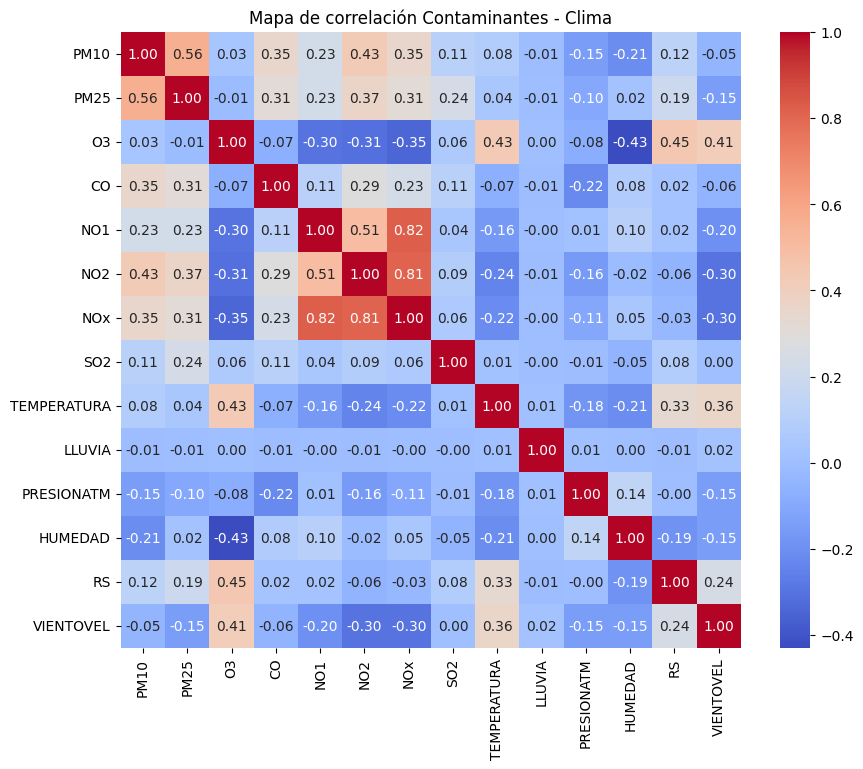

In [217]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de correlación Contaminantes - Clima")
plt.show()

In [218]:
#df_.to_csv(r"../WeatherData.csv", index=False)